--- Loading Data (Wort Only) ---
Successfully loaded: 14-11-25-Wort end 50ppb DMS boiling.csv (50 ppb)
Successfully loaded: Wort end 70 ppB DMS boiling.csv (70 ppb)
Successfully loaded: 14-11-25-Wort end 100ppb DMS boiling.csv (100 ppb)
Successfully loaded: Wort end 110ppB DMS Boiling.csv (110 ppb)

--- Dataset Statistics (All Wort) ---
Total samples: 17469
Samples 'Fail' (>= 100 ppb): 8460
Samples 'Pass' (< 100 ppb):  9009

--- Starting Training ---
Epoch 1/100


C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


350/350 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7220 - loss: 0.5396 - val_accuracy: 0.8182 - val_loss: 0.3984
Epoch 2/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8272 - loss: 0.3718 - val_accuracy: 0.8551 - val_loss: 0.3115
Epoch 3/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8571 - loss: 0.3178 - val_accuracy: 0.8751 - val_loss: 0.2641
Epoch 4/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8677 - loss: 0.2895 - val_accuracy: 0.8787 - val_loss: 0.2502
Epoch 5/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8728 - loss: 0.2750 - val_accuracy: 0.8909 - val_loss: 0.2372
Epoch 6/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8815 - loss: 0.2583 - val_accuracy: 0.8891 - val_loss: 0.2203
Epoch 7/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8866 - loss: 0.2424 - val_accuracy: 0.8941 - val_loss: 0.2181
Epoch 8/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8894 - loss: 0.2378 - val_accuracy: 0.8984

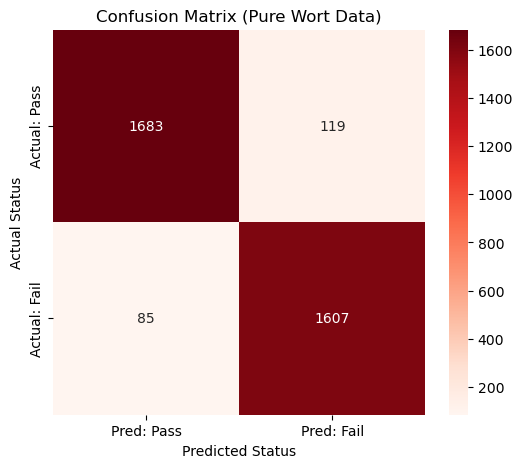


✅ Model and Scaler saved successfully!
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
METRICS SUMMARY
Accuracy:          0.9416
Precision (Class 1): 0.9311
Recall (Class 1):    0.9498
F1-Score:          0.9403
AUC Score:         0.9882



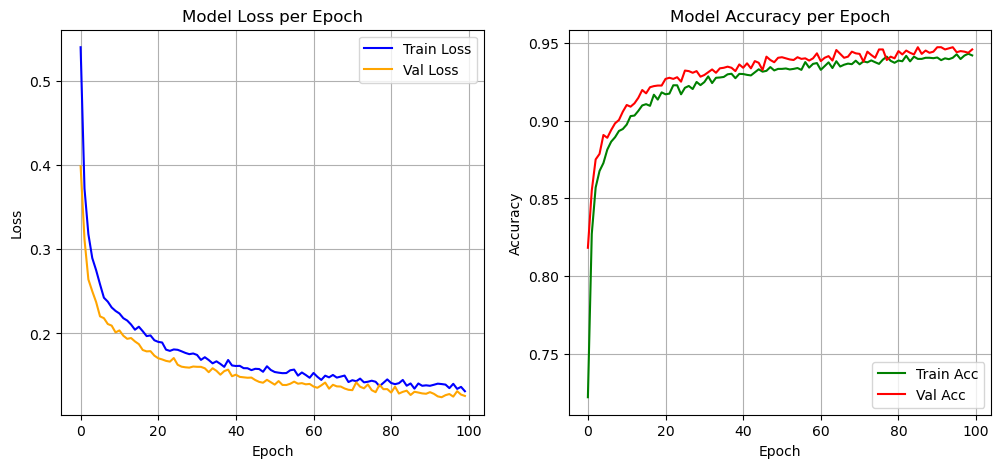

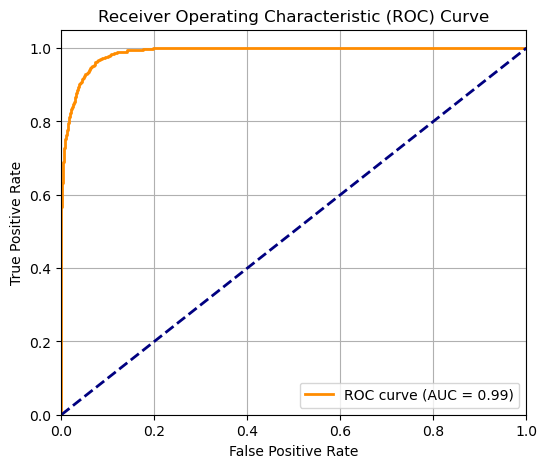


--- Classification Report ---
                  precision    recall  f1-score   support

   Pass (50 ppb)       0.95      0.93      0.94      1802
Fail (>=100 ppb)       0.93      0.95      0.94      1692

        accuracy                           0.94      3494
       macro avg       0.94      0.94      0.94      3494
    weighted avg       0.94      0.94      0.94      3494



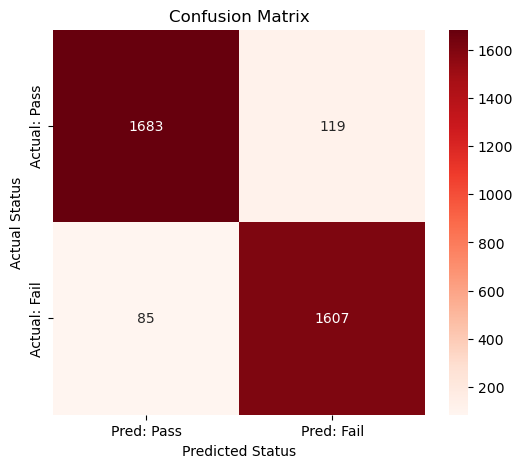

In [3]:
# Neccessary libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import os
import joblib

# 1. Directory Paths
base_dir_1 = r"C:\Users\DELL\OneDrive\Documents\Smart Brewery\Measurements\Measurements 11.11.2025"
base_dir_2 = r"C:\Users\DELL\OneDrive\Documents\Smart Brewery\Measurements\Measurements 14.11.2025"
base_dir_3 = r"C:\Users\DELL\OneDrive\Documents\Smart Brewery\Measurements\Measurements 24.11.2025"
base_dir_4 = r"C:\Users\DELL\OneDrive\Documents\Smart Brewery\Measurements\Measurements 28.11.2025"

# 2. Define files
files = {   
    0:   os.path.join(base_dir_3, "Wort end 0ppB DMS boiling .csv"), # Class 0 (Pass)
    50:  os.path.join(base_dir_2, "14-11-25-Wort end 50ppb DMS boiling.csv"), # Class 0 (Pass)
    70:  os.path.join(base_dir_4, "Wort end 70 ppB DMS boiling.csv"), # Class 0 (Pass)
    90:  os.path.join(base_dir_4, "Wort end 90 ppB DMS boiling.csv"), # Class 0 (Pass)                  
    100: os.path.join(base_dir_2, "14-11-25-Wort end 100ppb DMS boiling.csv"), # Class 1 (Fail)
    110: os.path.join(base_dir_4, "Wort end 110ppB DMS Boiling.csv"), # Class 1 (Fail)                  
    150: os.path.join(base_dir_3, "Wort end 150ppB DMS boiling .csv"), # Class 1 (Fail)
    
}

# 3. Read and Merge Data
data_frames = []
print("--- Loading Data (Wort Only) ---")
for conc, path in files.items():
    if os.path.exists(path):
        df = pd.read_csv(path)
        df['original_concentration'] = conc 
        data_frames.append(df)
        print(f"Successfully loaded: {os.path.basename(path)} ({conc} ppb)")
    else:
        print(f"Warning: File not found: {path}")

if not data_frames:
    raise ValueError("No data loaded. Please check your file paths!")

data = pd.concat(data_frames, ignore_index=True)

# 4. Drop unnecessary columns
drop_cols = [
    "id", "timestamp", "label", "sensorID",
    "measurementID", "heaterProfileID",
    "timeSincePowerOn", "stepIndex", 
    "original_concentration"
]

# 5. CREATE LABELS (THRESHOLD = 100 ppb)
y_classification = (data["original_concentration"] >= 100).astype(int)

# Create Input Data X
X = data.drop(columns=drop_cols, errors='ignore')

# Check dataset balance
print("\n--- Dataset Statistics (All Wort) ---")
print(f"Total samples: {len(X)}")
print(f"Samples 'Fail' (>= 100 ppb): {sum(y_classification == 1)}")
print(f"Samples 'Pass' (< 100 ppb):  {sum(y_classification == 0)}")

if sum(y_classification == 0) == 0 or sum(y_classification == 1) == 0:
    raise ValueError("ERROR: Dataset must contain both Pass (<100) and Fail (>=100) samples!")

# 6. Data Normalization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 7. Split Train/Test Sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_classification, 
    test_size=0.2, 
    random_state=42, 
    stratify=y_classification
)

# BUILD CLASSIFICATION MODEL

model = tf.keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid') # Binary Output
])

model.compile(
    optimizer='adam', 
    loss='binary_crossentropy', 
    metrics=['accuracy']
)

# TRAINING
print("\n--- Starting Training ---")
callback = tf.keras.callbacks.EarlyStopping(patience=15, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100, 
    batch_size=32, 
    verbose=1,
    callbacks=[callback]
)

# EVALUATION

# Predict
y_pred_prob = model.predict(X_test) 
y_pred = (y_pred_prob > 0.5).astype(int) 

# Report
print("\n--- Evaluation Report ---")
# Pass: 50ppb, Fail: 100 & 300 ppb
target_names = ['Pass (50 ppb)', 'Fail (>=100 ppb)'] 
print(classification_report(y_test, y_pred, target_names=target_names))

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', 
            xticklabels=['Pred: Pass', 'Pred: Fail'],
            yticklabels=['Actual: Pass', 'Actual: Fail'])
plt.title('Confusion Matrix (Pure Wort Data)')
plt.ylabel('Actual Status')
plt.xlabel('Predicted Status')
plt.show()

# STEP 5: SAVE MODEL
model.save('dms_wort_only_model.keras')
joblib.dump(scaler, 'dms_wort_only_scaler.pkl')
print("\n✅ Model and Scaler saved successfully!")

from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# DETAILED EVALUATION & STATISTICS
# 1. Predictions
y_pred_prob = model.predict(X_test).ravel() # Probabilities (0.0 - 1.0)
y_pred = (y_pred_prob > 0.5).astype(int)    # Binary Labels (0 or 1)

# 2. Calculate Metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred_prob)


print("METRICS SUMMARY")
print("="*40)
print(f"Accuracy:          {acc:.4f}")
print(f"Precision (Class 1): {prec:.4f}")
print(f"Recall (Class 1):    {rec:.4f}")
print(f"F1-Score:          {f1:.4f}")
print(f"AUC Score:         {auc_score:.4f}")
print("="*40 + "\n")

# 3. Plot Training History
# Useful to detect Overfitting (if Val Loss increases while Train Loss decreases)
plt.figure(figsize=(12, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss', color='blue')
plt.plot(history.history['val_loss'], label='Val Loss', color='orange')
plt.title('Model Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Acc', color='green')
plt.plot(history.history['val_accuracy'], label='Val Acc', color='red')
plt.title('Model Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# 4. Plot ROC Curve
# The closer the curve follows the top-left border, the better the test.
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') # Random guess line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# 5. Classification Report & Confusion Matrix
target_names = ['Pass (50 ppb)', 'Fail (>=100 ppb)']
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred, target_names=target_names))

plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', 
            xticklabels=['Pred: Pass', 'Pred: Fail'],
            yticklabels=['Actual: Pass', 'Actual: Fail'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Status')
plt.xlabel('Predicted Status')
plt.show()